# Recommendation Systems Part 1
> The three part series on building a beginner's recommendation system with Python. This blog provides a simple implementation of demographic filtering in Python.

- toc: true
- comments: true
- categories: [python, recommendation system, relevancy, collaborative filtering, content-based filtering, demographic filtering]

## Introduction

Recommendation systems have become central to most of the popular apps such as Netflix, Spotify, Flipkart, etc. These provide better recommendation to the user based on past search history or keyword searched by the user or similarity of the user to the other users' behavior on the platform. Recommendation systems try to find the relevance of the content or item for the user by proving a scoring mechanism for each user-item pair. The targeted recommendations are used to drive more engagement on the platform which in turn would lead be more retention and revenue opportunity for these apps. 

## Types of Recommendation Systems

- Demographic Filtering: This provides the same recommendation to all the audience based on popularity, rating or genre of the item. We can see this type of recommendations in sections such as 'Trending Now', 'Popular on Netflix', etc. This is one of the most simple form of filtering. This assumes that items which are more popular or critically acclaimed will have higher chances of being liked by the general audience.

![](img/Netflix1.png)

- Content Based Filtering: This suggests similar items based on a particular item. This uses the item's similarity with the previously liked or saved items of the user based on item's metadata or current search keywords used by user to find some item. This assumes that a user has higher chances to like similar items based on previous history of the user. Also, this helps in giving relevant recommendations to the user based on searched keywords.

![](img/Netflix2.PNG)

- Collaborating Filtering: This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like in content-based filtering. This kind of recommendations implementation can be seen in Amazon or Flipkart under 'Frequently Bought Together' section.

![](img/Flipkart1.PNG)

## Data Preparation

We have taken the data of ~5000 English Movies from Kaggle (https://www.kaggle.com/tmdb/tmdb-movie-metadata). With this data, we would try to understand each of three types of recommendation systems by developing Machine Learning models in Python. 

The first dataset 'tmdb_5000_credits' contains the following features:
- movie_id - A unique identifier for each movie
- cast - The name of lead and supporting actors
- crew - The name of Director, Editor, Composer, Writer etc.

The second dataset 'tmdb_5000_movies' has the following features:
- budget - The budget in which the movie was made
- genre - The genre of the movie (Action, Comedy ,Thriller etc.)
- homepage - A link to the homepage of the movie
- id - This is infact the movie_id as in the first dataset
- keywords - The keywords or tags related to the movie
- original_language - The language in which the movie was made
- original_title - The title of the movie before translation or adaptation
- overview - A brief description of the movie
- popularity - A numeric quantity specifying the movie popularity at the moment
- production_companies - The production house of the movie
- production_countries - The country in which it was produced
- release_date - The date on which it was released
- revenue - The worldwide revenue generated by the movie
- runtime - The running time of the movie in minutes
- status - "Released" or "Rumored"
- tagline - Movie's tagline
- title - Title of the movie
- vote_average - average ratings the movie recieved
- vote_count - the count of votes recieved

In [1]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb-movie-metadata/tmdb_5000_movies.csv')

We can now join the two datasets on 'id' column.

In [2]:
df1.columns = ['id','movie_title','cast','crew']
df2= df2.merge(df1,on='id')

Let's see how the combined data looks like!

In [19]:
df2.shape

(4803, 23)

The database contains 4803 movies and 23 features or variables.

In [3]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Let's keep only the most important features from the combined dataset - title, cast, crew, genres, keywords, vote_count, vote_average, popularity

In [4]:
data = df2[['movie_title', 'cast','crew','genres','keywords','vote_count','vote_average','popularity']]
data.head()

,movie_title,cast,crew,genres,keywords,vote_count,vote_average,popularity
0,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",11800,7.2,150.437577
1,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",4500,6.9,139.082615
2,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",4466,6.3,107.376788
3,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",9106,7.6,112.312950
4,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",2124,6.1,43.926995


As we can see from the above data, cast, crew, genres and keywords are lists of JSON objects: JSON objects are surrounded by curly braces {}. JSON objects are written in key/value pairs. Keys must be strings, and values must be a valid JSON data type (string, number, object, array, boolean or null). Keys and values are separated by a colon. Each key/value pair is separated by a comma.

We will now extract the values of the first three actor names from the feature 'cast' using key 'name', director from feature 'crew' using key 'job' = Director and key 'name', first three movie genre from feature 'genres' using key 'name' and first three keywords related to movie from feature 'keywords' using key 'name'.

In [5]:
## Extract cast, crew, keywords and genre

# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    data[feature] = data[feature].apply(literal_eval)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# Get the first three names from the cast,keywords and genre features.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [7]:
# Define new director, cast, genres and keywords features that are in a suitable form.
data['director'] = data['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    data[feature] = data[feature].apply(get_list)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Let's look at how the data looks like now.

In [8]:
data.head()

,movie_title,cast,crew,genres,keywords,vote_count,vote_average,popularity,director
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...","[Action, Adventure, Fantasy]","[culture clash, future, space war]",11800,7.2,150.437577,James Cameron
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]",4500,6.9,139.082615,Gore Verbinski
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[Action, Adventure, Crime]","[spy, based on novel, secret agent]",4466,6.3,107.376788,Sam Mendes
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]",9106,7.6,112.312950,Christopher Nolan
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]",2124,6.1,43.926995,Andrew Stanton


## Demographic Filtering

Let's start with demographic filtering. We would need a metric to score the items and rank them accordingly. Every platform or app has their own way of evaluating this metric. Platforms can take the reliable data sources to pull out the information on items (such as ratings, votes etc.), calculate the score for each item, rank them in descending order and show the top items to the users.

### Recommendation based on highest ratings calculated using total votes

For the above movie database, we can use the average rating provided by the voters to rank, however this has a major flaw in terms of skewness due to movies with very low number of votes. For example, movie with 8.5 rating with only 3 votes may not be better than movie with 7.8 rating with 100 votes.

In order to go around this, I have taken the weighted rating approach followed by IMDB to rate the movies in this tutorial.

![](img/imdb.png)

where,
- v is the number of votes for the movie;
- m is the minimum votes required to be listed in the chart;
- R is the average rating of the movie; And
- C is the mean vote across the whole report

We already have values of v(vote_count) and R(vote_average). C can be calculated from the data.

Let's calculate the mean rating across the whole database of 4803 movies.

In [9]:
C= data['vote_average'].mean()
C

6.092171559442011

So, the mean rating for all the movies is approx 6 on a scale of 10.

The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. Let's assume the cutoff is 80th percentile. In other words, for a movie to feature in the charts, it must have more votes than at least 80% of the movies in the list.

In [21]:
m= data['vote_count'].quantile(0.7)
m

581.0

Hence, for a movie to feature, it must have minimum  of 581 votes. 

Let's filter out the movies with this criteria. We can then calculate the weighted rating for the qualified movies using the formula mentioned above

In [22]:
q_movies = data.copy().loc[data['vote_count'] >= m]
q_movies.shape

(1442, 9)

We see that there are 1442 movies which qualify to be in this list. 

Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies;

In [12]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [24]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Let's look at the top 10 highest rated movies!

In [28]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 10 movies
q_movies[['movie_title', 'vote_count', 'vote_average', 'score']].head(10)

,movie_title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Best Rated Movies')

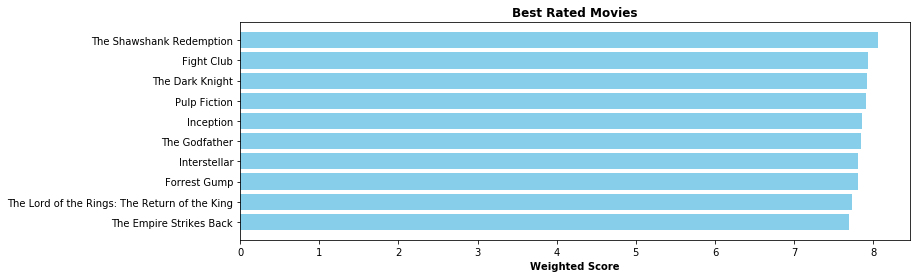

In [34]:
#Let's create the plot of top 10 movies based on weighted score

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(q_movies['movie_title'].head(10),q_movies['score'].head(10), align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Weighted Score", weight='bold')
plt.title("Best Rated Movies",weight='bold')

We can see the classics such as 'The GodFather', 'The Shawshank Redemption', etc. in the above list. These are the best movies of all times and our recommendation system might work in case we want to show the greatest hits of all time based on votes.

### Recommendation based on maximum popularity at the moment

In case we want to show the movies currently popular among the app users, we would need the popularity score for each movie, rank them in descending order and show the movies with highest popularity score to the users.

For the above movies database, popularity score has been already calculated and available in the feature 'popularity'. Each app build their popularity ratings differently. In the data provided, it has been built using the follwowing information:

- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favourite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score

Details in the link - https://developers.themoviedb.org/3/getting-started/popularity

Let's look at the top 10 movies based on popularity!

Text(0.5, 1.0, 'Most Popular Movies')

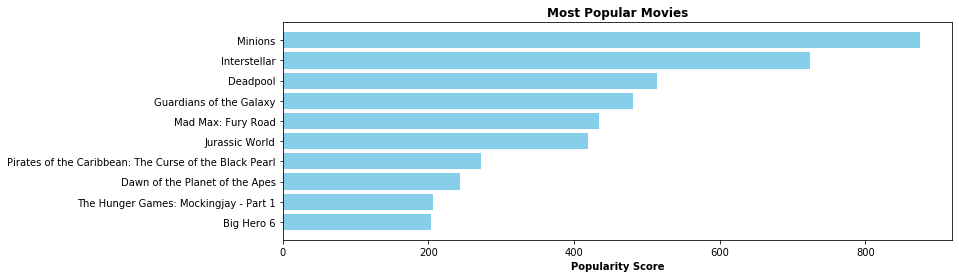

In [36]:
pop= data.sort_values('popularity', ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['movie_title'].head(10),pop['popularity'].head(10), align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity Score", weight='bold')
plt.title("Most Popular Movies",weight='bold')

The above lists has classics as well as movies popular among the masses. The above recommendations logics can be experimented and the best recommendation engine based on superior performance (eg. one with highest engagement of app users) can be deployed.

## Endnotes

I hope this has helped in developing a basic understanding of what recommendation systems are, how they work, some of the different types and implementation of demographic filtering using the dummy dataset of ~5000 English Movies. Feel free to play around with the code by opening in Colab or cloning the repo in github.

In the next two blogs, I will work on other two types of recommendation systems - Content-based Filtering and Collaborative Filtering. 

If you have any comments or suggestions please comment below or reach out to me at - [Twitter](https://twitter.com/rahulsingla0959) or [LinkedIn](https://www.linkedin.com/in/rahul-singla1/)